### Slade Brooks
### brooksl@mail.uc.edu
### Exam 1
### Question 2

In [69]:
import numpy as np
import sys
import pandas as pd
from matplotlib import pyplot as plt

# import custom modules
sys.path.append("..//lib//")
import pyvot

In [70]:
# create pressure ratio function
def presRatio(M, y):
    """
    computes stag pres ratio from mach and gamma
    """
    pr = (1 + ((y - 1)/2)*M**2)**(y/(y - 1))
    return pr

In [71]:
# get array of vals from M 0 to 2 by 0.2 for y=1.4
y = 1.4
Ms = np.arange(0, 2.2, 0.2)
prs = np.zeros(len(Ms))

for i in range(0, len(Ms)):
    prs[i] = presRatio(Ms[i], y)

# make a table of vals

# make a dictionary of the values
vals = dict(Mach = Ms, PresRatio = prs)

# create a pandas dataframe
df = pd.DataFrame(vals)

# get rid of decimals
pd.options.display.float_format = '{:.3f}'.format

# output table
print(df)

    Mach  PresRatio
0  0.000      1.000
1  0.200      1.028
2  0.400      1.117
3  0.600      1.276
4  0.800      1.524
5  1.000      1.893
6  1.200      2.425
7  1.400      3.182
8  1.600      4.250
9  1.800      5.746
10 2.000      7.824


In [72]:
# compute linear polyfit (m=1)
lin = pyvot.polyFit(Ms.copy(), prs.copy(), 1)
print("The linear polyFit is: \t ({0:.2f})x + ({1:.2f})".format(lin[1], lin[0]))

# compute quadratic polyfit (m=2)
quad = pyvot.polyFit(Ms.copy(), prs.copy(), 2)
print("The quadratic polyFit is: \t ({0:.2f})x^2 + ({1:.2f})x + ({2:.2f})".format(quad[2], quad[1], quad[0]))

# compute cubic polyfit (m=3)
cubic = pyvot.polyFit(Ms.copy(), prs.copy(), 3)
print("The cubic polyFit is: \t ({0:.2f})x^3 + ({1:.2f})x^2 + ({2:.2f})x + ({3:.2f})".format(cubic[3], cubic[2], cubic[1], cubic[0]))

The linear polyFit is: 	 (3.05)x + (-0.21)
The quadratic polyFit is: 	 (2.52)x^2 + (-1.99)x + (1.30)
The cubic polyFit is: 	 (1.24)x^3 + (-1.20)x^2 + (0.85)x + (0.95)


In [73]:
# test val M = 1.35
Mtest = 1.35

# determine pr @ 1.35 using each polyfit
linPR = (lin[1])*(Mtest) + lin[0]
quadPR = (quad[2])*(Mtest)**2 + (quad[1])*Mtest + quad[0]
cubicPR = (cubic[3])*(Mtest)**3 + (cubic[2])*(Mtest)**2 + (cubic[1])*Mtest + cubic[0]

print("The linear polyfit PR @ M=1.35 and y=1.4 is: \t {:.3f}".format(linPR))
print("The quadratic polyfit PR @ M=1.35 and y=1.4 is: \t {:.3f}".format(quadPR))
print("The cubic polyfit PR @ M=1.35 and y=1.4 is: \t {:.3f}".format(cubicPR))

The linear polyfit PR @ M=1.35 and y=1.4 is: 	 3.910
The quadratic polyfit PR @ M=1.35 and y=1.4 is: 	 3.211
The cubic polyfit PR @ M=1.35 and y=1.4 is: 	 2.956


In [74]:
# calcaulte exact value w/ fxn
exact = presRatio(1.35, 1.4)

print("The exact value is: \t {:.3f}".format(exact))

The exact value is: 	 2.968


The fit that gives the best results is the cubic, which was off by only 0.012 M. This makes sense as it was the highest order fit, so it could adhere to the data more accurately.
This can be seen in the plots below showing how as the order of polyfit increases, the approximation moves closer and closer to the exact values with the cubic being almost identical to the data.

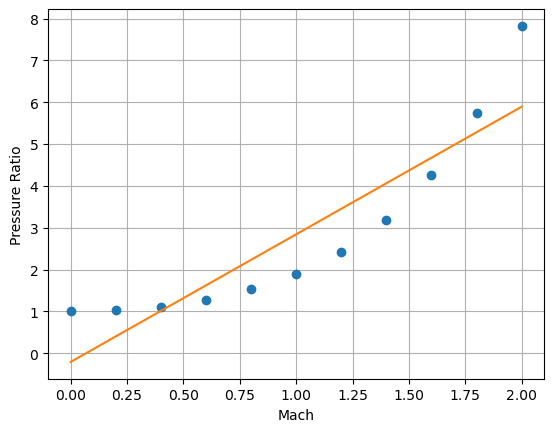

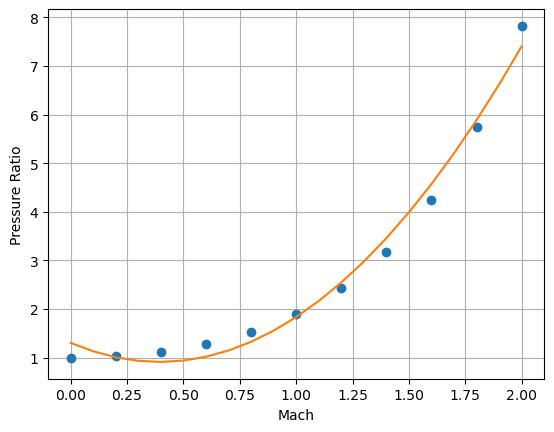

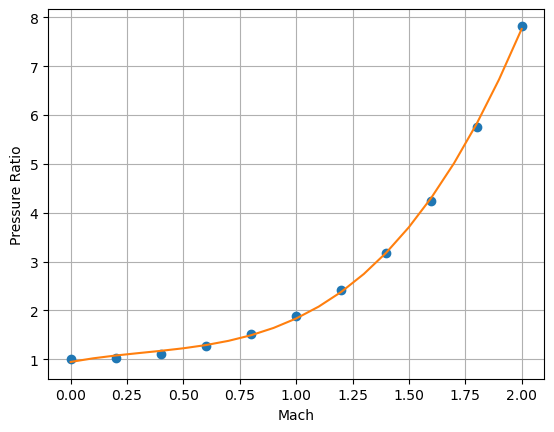

In [75]:
# plot data
pyvot.plotPoly(Ms.copy(), prs.copy(), lin.copy(), xlab="Mach", ylab="Pressure Ratio")
pyvot.plotPoly(Ms.copy(), prs.copy(), quad.copy(), xlab="Mach", ylab="Pressure Ratio")
pyvot.plotPoly(Ms.copy(), prs.copy(), cubic.copy(), xlab="Mach", ylab="Pressure Ratio")